In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [8]:
df = pd.read_csv("diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [13]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

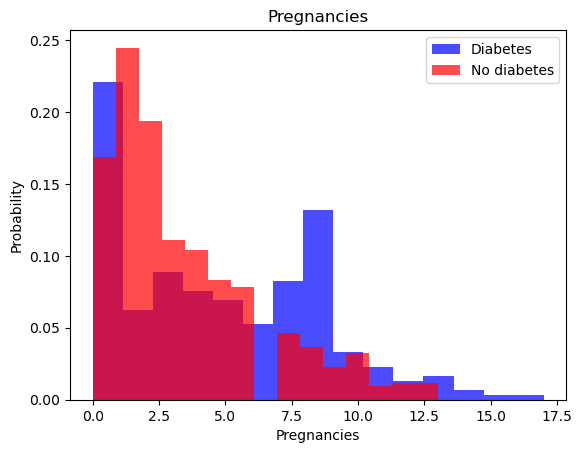

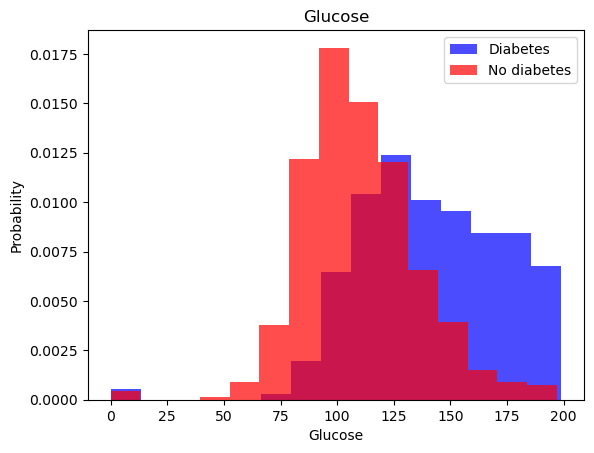

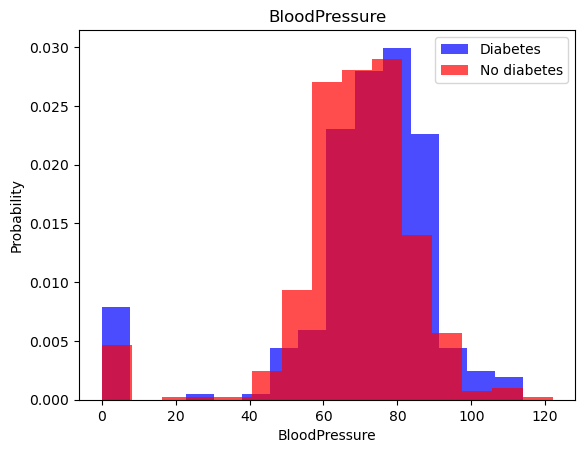

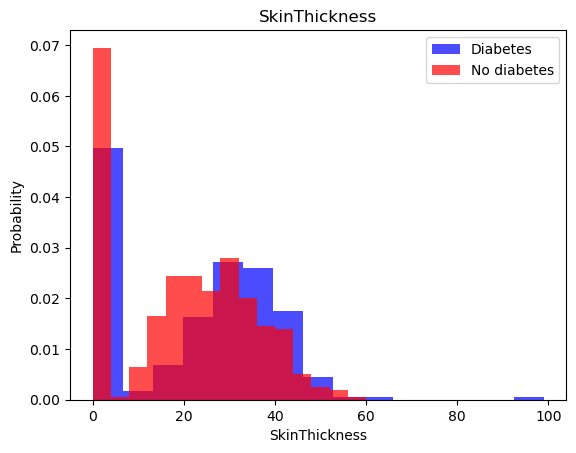

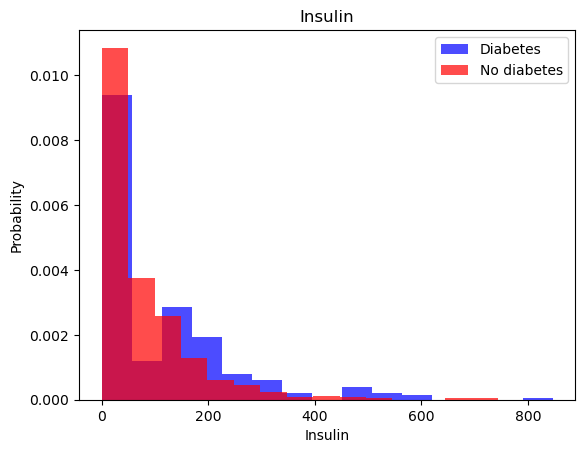

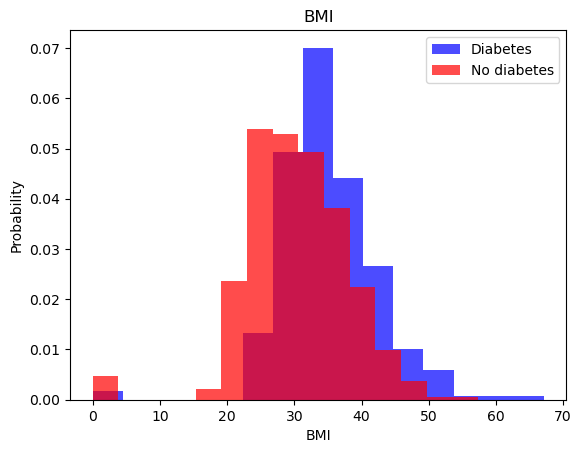

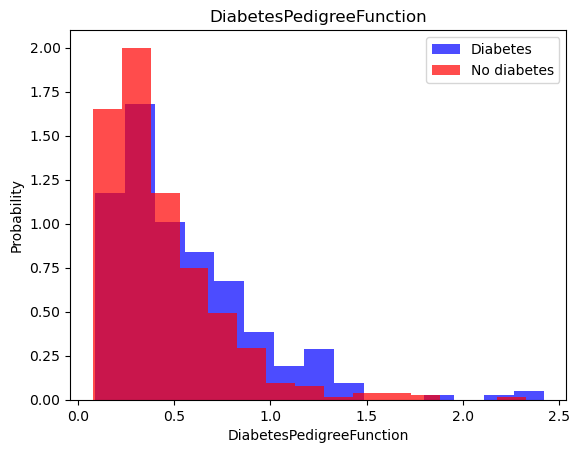

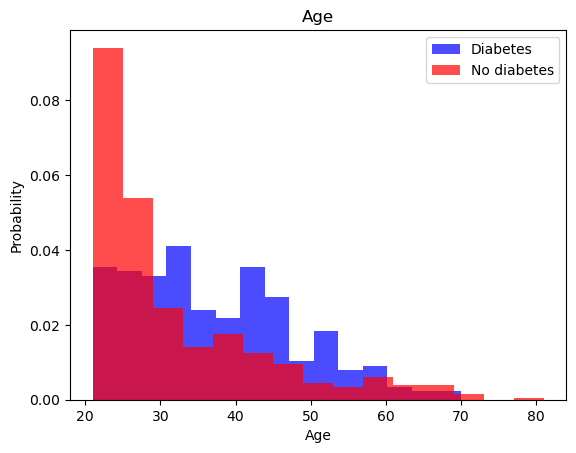

In [14]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color="blue", label="Diabetes", alpha=0.7, bins=15, density=True)
  plt.hist(df[df['Outcome']==0][label], color="red", label="No diabetes", alpha=0.7, bins=15, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [15]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [16]:
x.shape, y.shape

((768, 8), (768,))

In [17]:
 # fixing data magnitud difference
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [18]:
# fixing diabetes and no diabetes quantity difference
over =  RandomOverSampler()
x, y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [19]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [20]:
# Normalized data

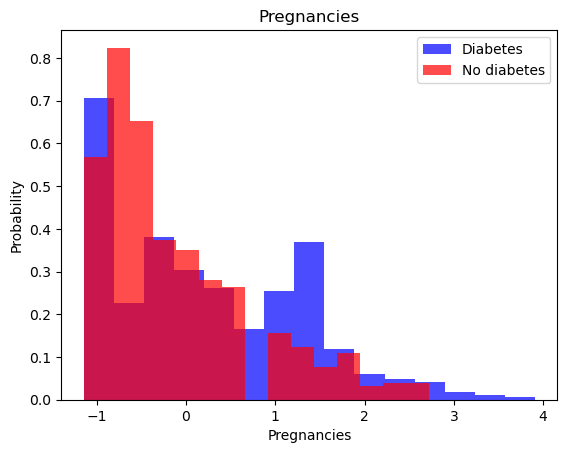

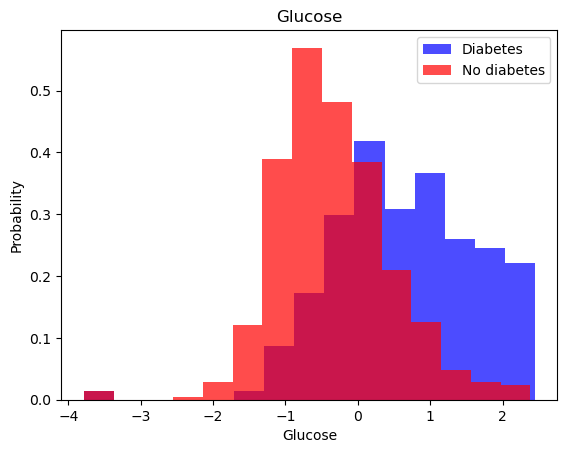

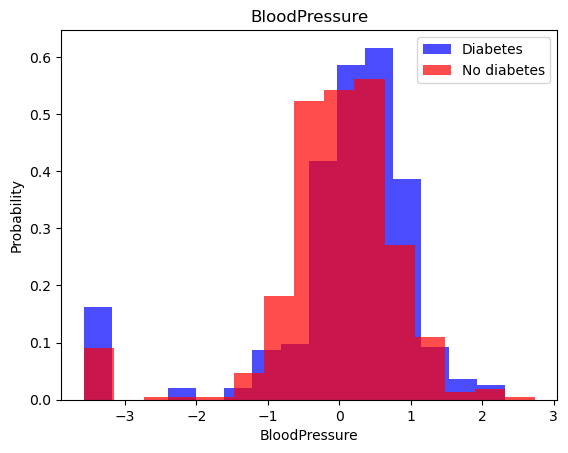

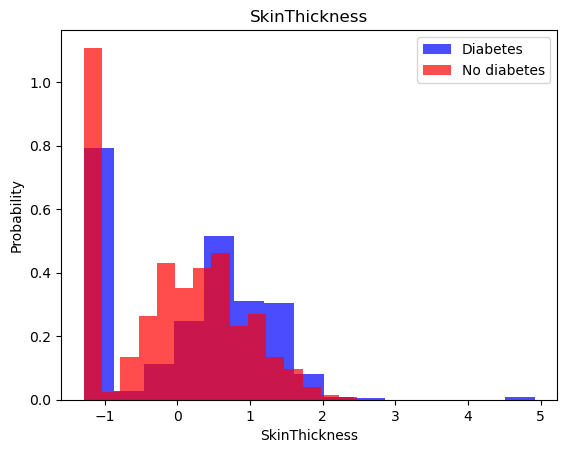

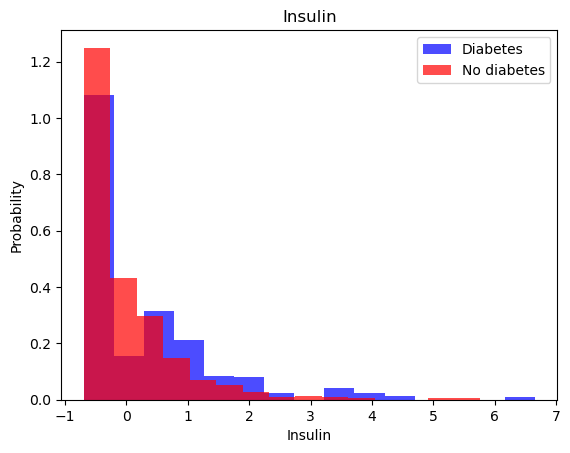

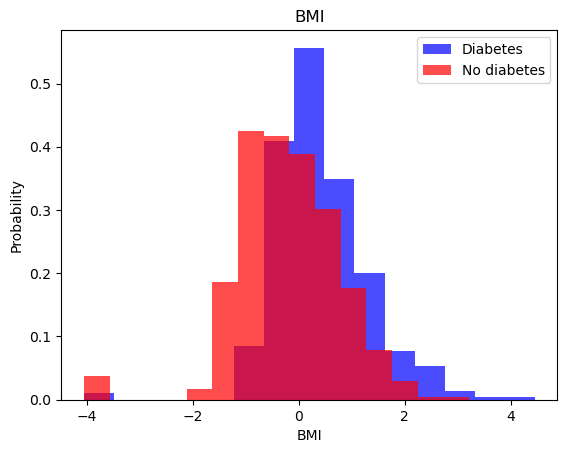

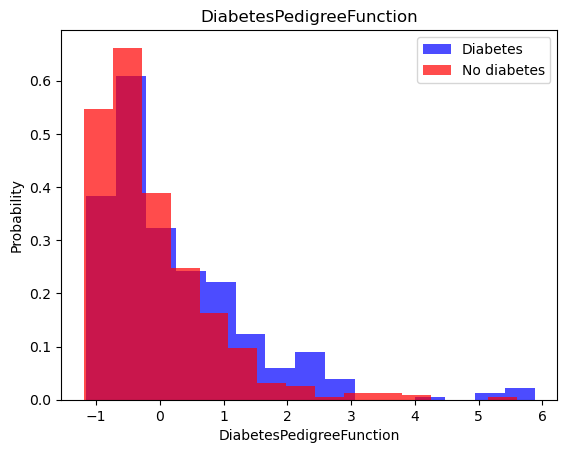

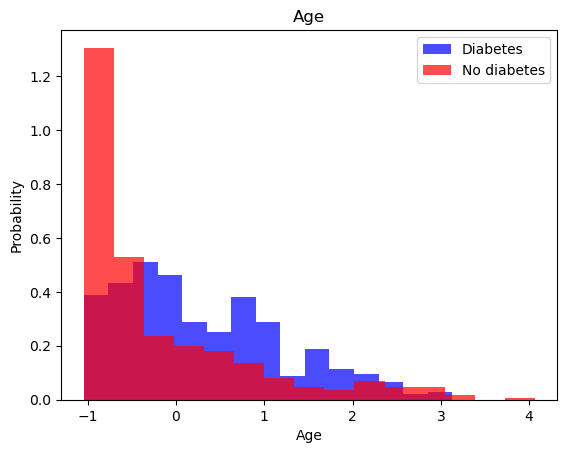

In [21]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color="blue", label="Diabetes", alpha=0.7, bins=15, density=True)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color="red", label="No diabetes", alpha=0.7, bins=15, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [22]:
# Training, Validation and Test

In [23]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp , y_temp, test_size=0.5, random_state=0)

In [24]:
from pyparsing import actions
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"), # if x<0 -> 0, x>0 -> x
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [26]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7596 - accuracy: 0.5067


[0.7596399188041687, 0.5066666603088379]

In [27]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 1ms/step - loss: 0.7349 - accuracy: 0.5550


[0.7348564863204956, 0.5550000071525574]

In [28]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.5400 - val_loss: 0.6286 - val_accuracy: 0.6350
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6067 - val_loss: 0.5676 - val_accuracy: 0.7250
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.6567 - val_loss: 0.5254 - val_accuracy: 0.7700
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7067 - val_loss: 0.4953 - val_accuracy: 0.8100
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7283 - val_loss: 0.4767 - val_accuracy: 0.8050
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7317 - val_loss: 0.4664 - val_accuracy: 0.8000
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7400 - val_loss: 0.4556 - val_accuracy: 0.8100
Epoch 8/20
38/38 [==

In [29]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8000


[0.47487589716911316, 0.800000011920929]